# 🍷 Wine Quality Prediction - EDA & Preprocessing

This notebook performs comprehensive exploratory data analysis and preprocessing for the wine quality dataset.

## Objectives:
1. Load and explore the wine quality dataset
2. Perform statistical analysis and visualizations
3. Handle missing values and outliers
4. Create binary target variable (Good/Bad quality)
5. Scale features and save processed data


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("📚 Libraries imported successfully!")
print("🔧 Setting up visualization parameters...")


📚 Libraries imported successfully!
🔧 Setting up visualization parameters...


## 1. Data Loading and Initial Exploration


In [2]:
# Load the dataset
df = pd.read_csv('../data/raw/winequality-red.csv')

print("🍷 Wine Quality Dataset Loaded Successfully!")
print(f"📊 Dataset Shape: {df.shape}")
print(f"📋 Columns: {list(df.columns)}")
print("\n" + "="*50)


🍷 Wine Quality Dataset Loaded Successfully!
📊 Dataset Shape: (1599, 12)
📋 Columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']



In [3]:
# Display basic information about the dataset
print("📋 Dataset Info:")
print(df.info())
print("\n" + "="*50)

print("📊 Dataset Description:")
print(df.describe())
print("\n" + "="*50)

print("👀 First 5 rows:")
print(df.head())


📋 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None

📊 Dataset Description:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1

In [4]:
# Check for missing values and duplicates
print("🔍 Data Quality Check:")
print(f"Missing values per column:")
print(df.isnull().sum())
print(f"\nTotal missing values: {df.isnull().sum().sum()}")
print(f"Duplicate rows: {df.duplicated().sum()}")
print(f"Unique values in quality: {sorted(df['quality'].unique())}")
print(f"Quality distribution:")
print(df['quality'].value_counts().sort_index())


🔍 Data Quality Check:
Missing values per column:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Total missing values: 0
Duplicate rows: 240
Unique values in quality: [np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
Quality distribution:
quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64


## 2. Data Visualizations


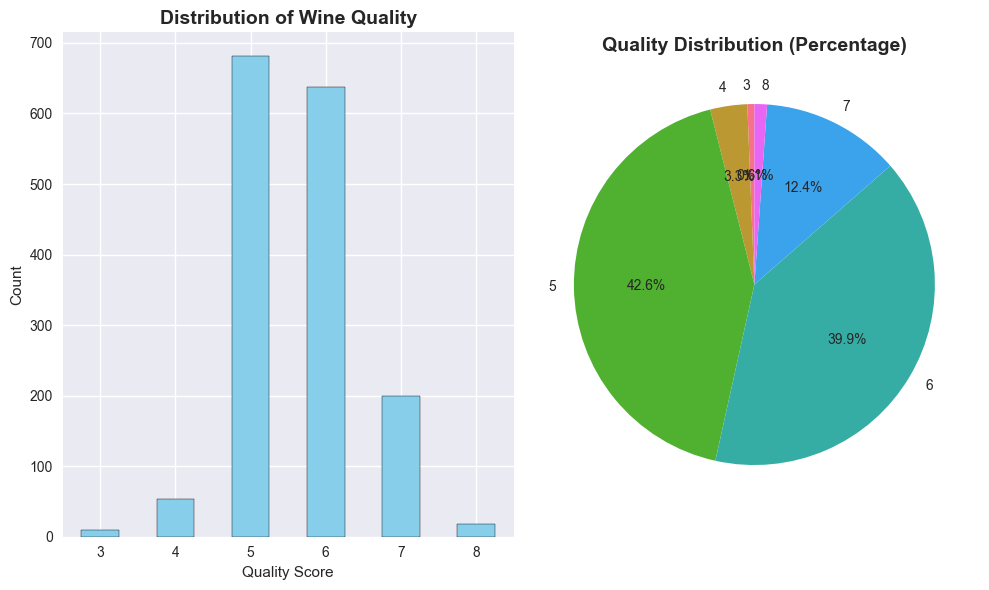

📊 Quality distribution insights:
• Most wines have quality scores between 5-6
• Very few wines have quality scores of 3 or 8
• Average quality: 5.64
• Quality range: 3 to 8


In [5]:
# Distribution of quality (target variable)
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
df['quality'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Wine Quality', fontsize=14, fontweight='bold')
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
df['quality'].value_counts().sort_index().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Quality Distribution (Percentage)', fontsize=14, fontweight='bold')
plt.ylabel('')

plt.tight_layout()
plt.show()

print("📊 Quality distribution insights:")
print(f"• Most wines have quality scores between 5-6")
print(f"• Very few wines have quality scores of 3 or 8")
print(f"• Average quality: {df['quality'].mean():.2f}")
print(f"• Quality range: {df['quality'].min()} to {df['quality'].max()}")


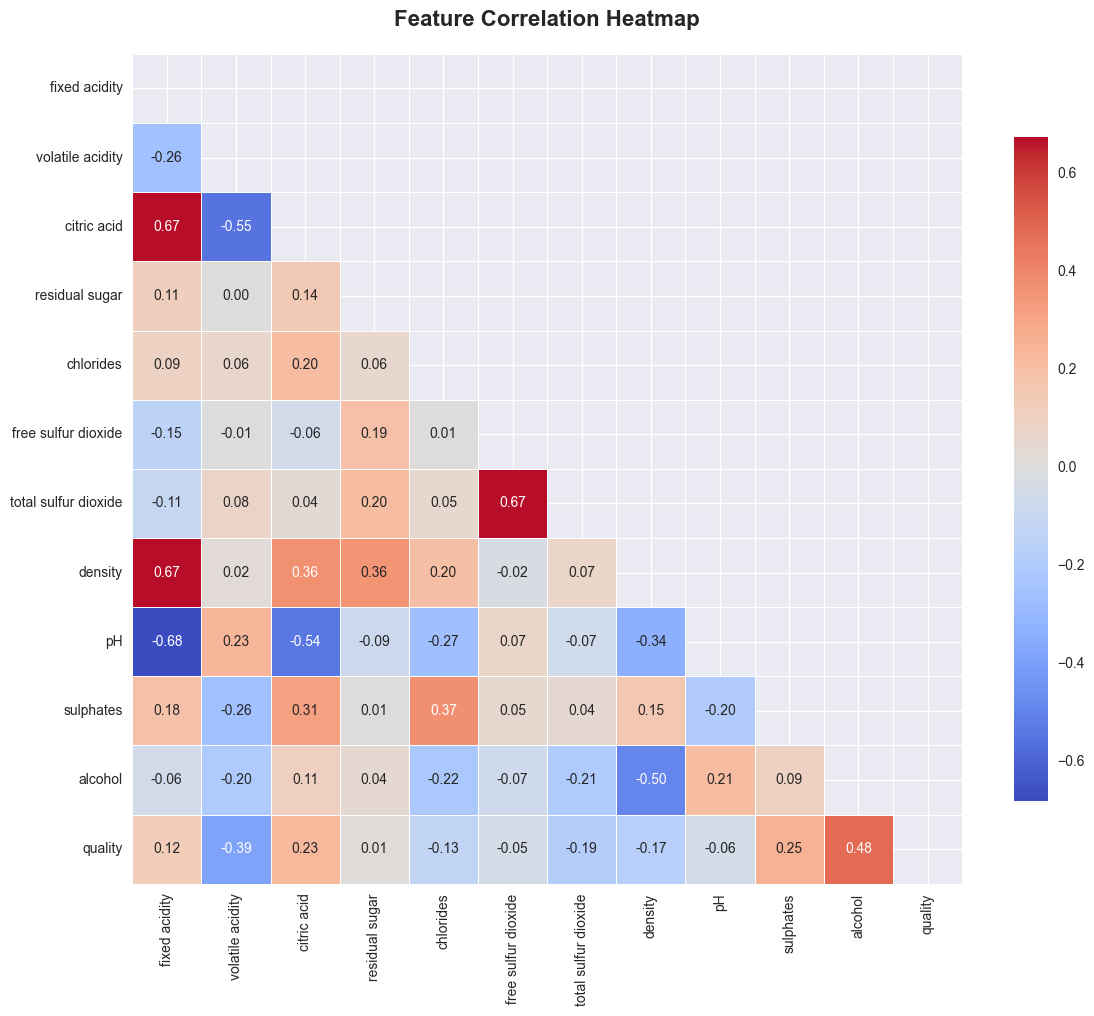

🔗 Correlation insights:
• Strong positive correlations with quality:
  - alcohol: 0.476

• Strong negative correlations with quality:
  - volatile acidity: -0.391


In [6]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8}, fmt='.2f')
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("🔗 Correlation insights:")
print("• Strong positive correlations with quality:")
quality_corr = correlation_matrix['quality'].sort_values(ascending=False)
for feature, corr in quality_corr.items():
    if feature != 'quality' and corr > 0.3:
        print(f"  - {feature}: {corr:.3f}")
print("\n• Strong negative correlations with quality:")
for feature, corr in quality_corr.items():
    if feature != 'quality' and corr < -0.3:
        print(f"  - {feature}: {corr:.3f}")


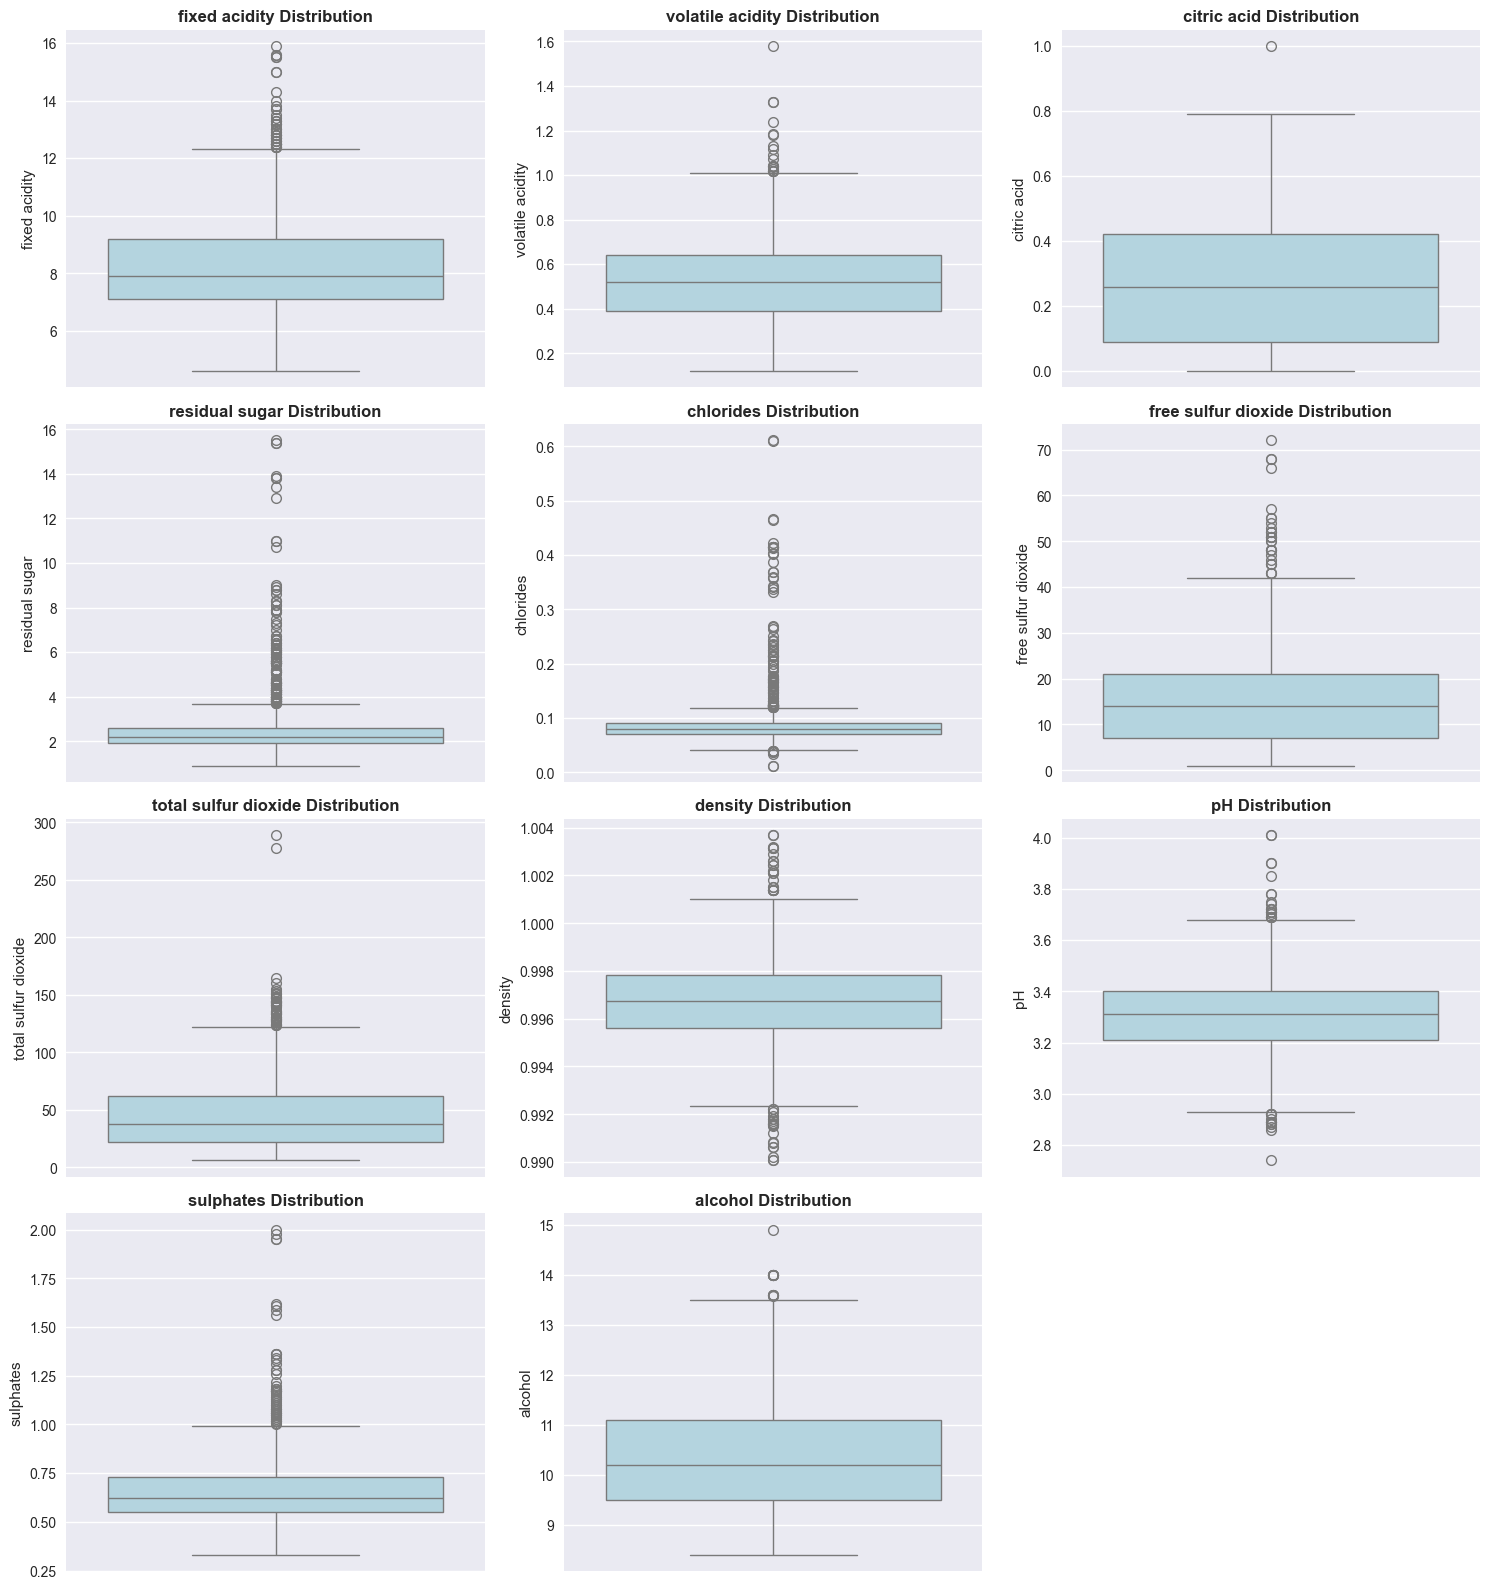

📦 Outlier Analysis:
• fixed acidity: 49 outliers (3.1%)
• volatile acidity: 19 outliers (1.2%)
• citric acid: 1 outliers (0.1%)
• residual sugar: 155 outliers (9.7%)
• chlorides: 112 outliers (7.0%)
• free sulfur dioxide: 30 outliers (1.9%)
• total sulfur dioxide: 55 outliers (3.4%)
• density: 45 outliers (2.8%)
• pH: 35 outliers (2.2%)
• sulphates: 59 outliers (3.7%)
• alcohol: 13 outliers (0.8%)


In [7]:
# Box plots for outlier detection
features = [col for col in df.columns if col != 'quality']
n_features = len(features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

plt.figure(figsize=(15, 4 * n_rows))
for i, feature in enumerate(features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(data=df, y=feature, color='lightblue')
    plt.title(f'{feature} Distribution', fontweight='bold')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

print("📦 Outlier Analysis:")
for feature in features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    print(f"• {feature}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.1f}%)")


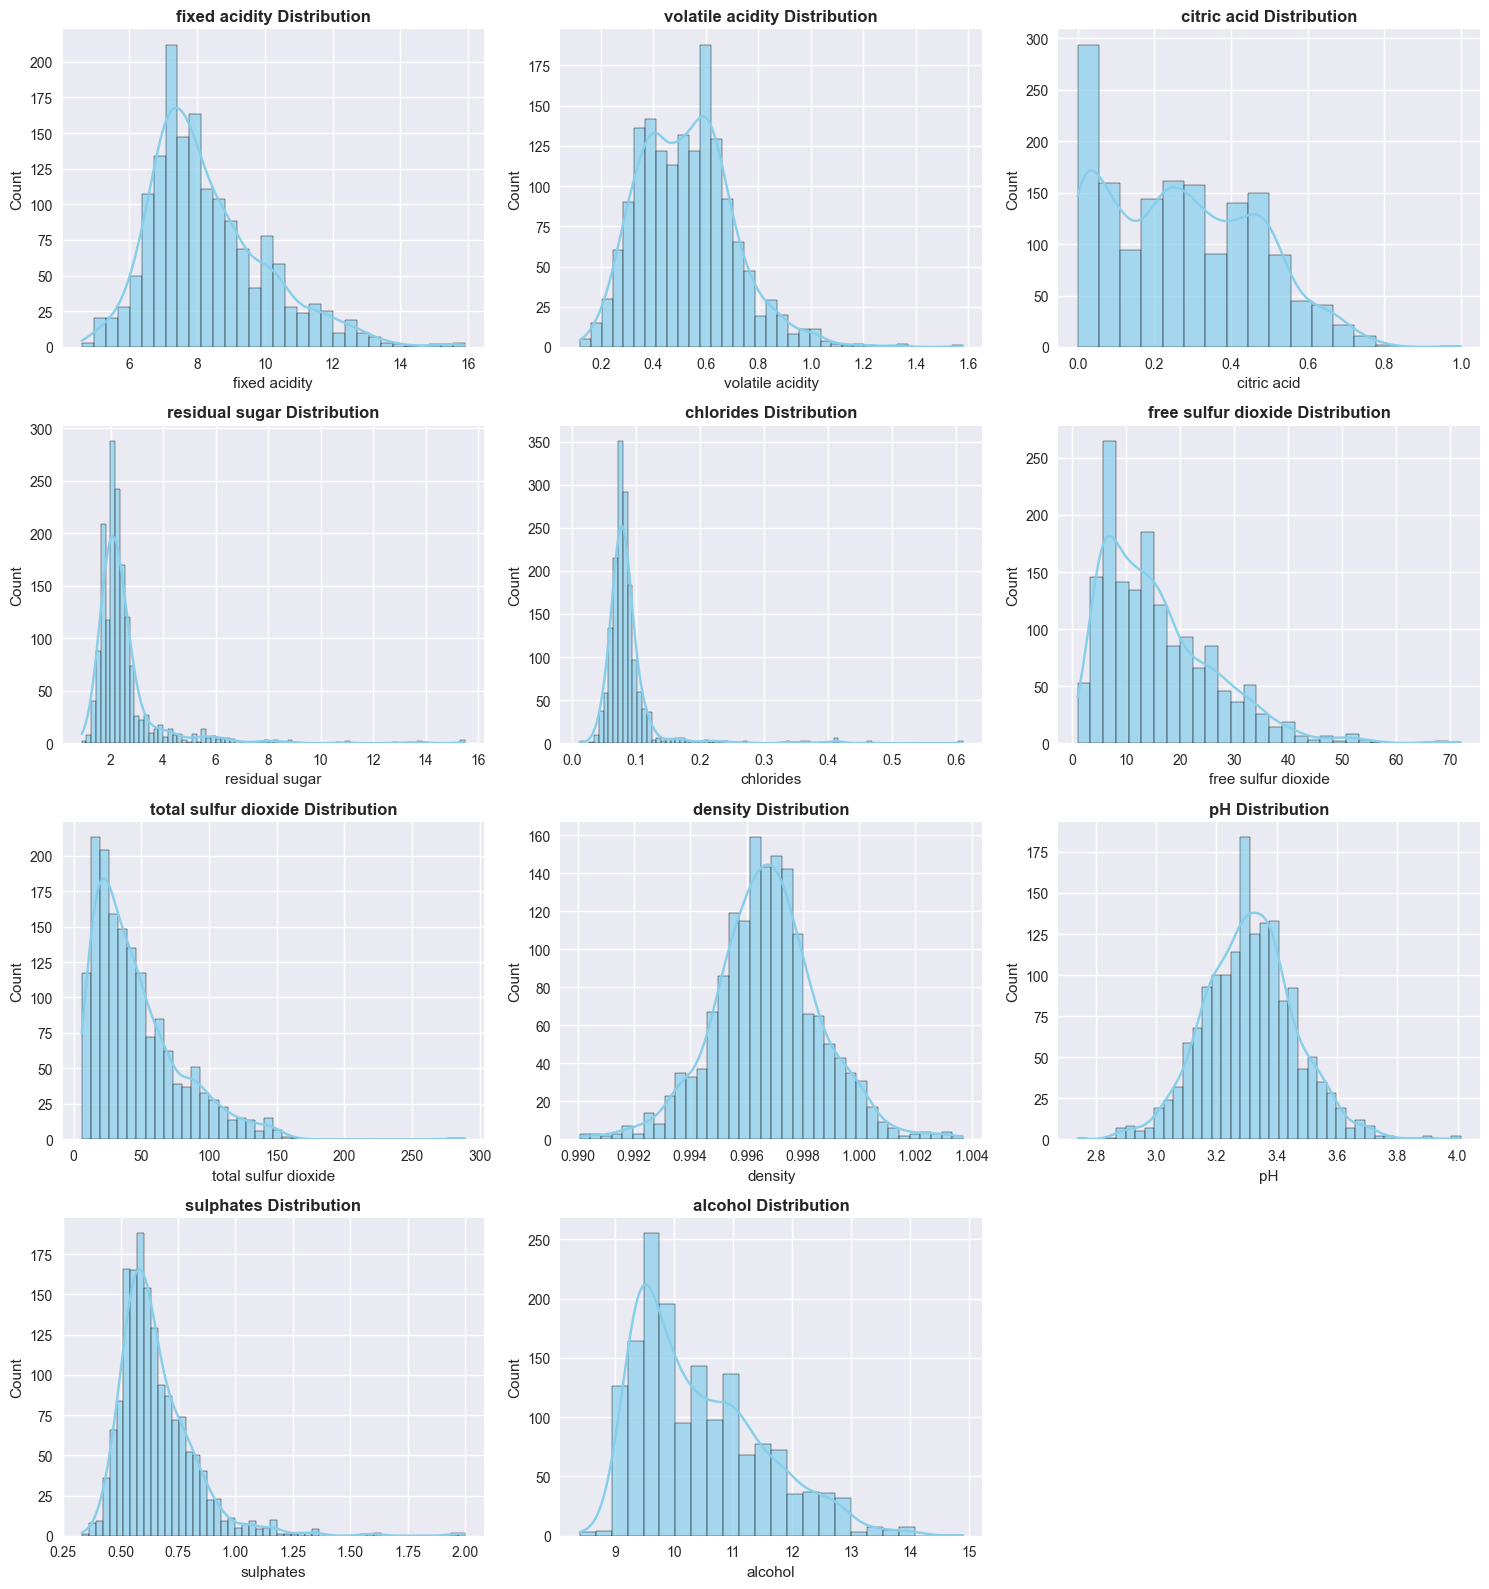

📊 Feature Distribution Insights:
• fixed acidity: Skewness=0.98, Kurtosis=1.13
  → Moderately skewed distribution
• volatile acidity: Skewness=0.67, Kurtosis=1.23
  → Moderately skewed distribution
• citric acid: Skewness=0.32, Kurtosis=-0.79
  → Approximately normal distribution
• residual sugar: Skewness=4.54, Kurtosis=28.62
  → Highly skewed distribution
• chlorides: Skewness=5.68, Kurtosis=41.72
  → Highly skewed distribution
• free sulfur dioxide: Skewness=1.25, Kurtosis=2.02
  → Highly skewed distribution
• total sulfur dioxide: Skewness=1.52, Kurtosis=3.81
  → Highly skewed distribution
• density: Skewness=0.07, Kurtosis=0.93
  → Approximately normal distribution
• pH: Skewness=0.19, Kurtosis=0.81
  → Approximately normal distribution
• sulphates: Skewness=2.43, Kurtosis=11.72
  → Highly skewed distribution
• alcohol: Skewness=0.86, Kurtosis=0.20
  → Moderately skewed distribution


In [8]:
# Feature distributions
plt.figure(figsize=(15, 4 * n_rows))
for i, feature in enumerate(features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data=df, x=feature, kde=True, color='skyblue', alpha=0.7)
    plt.title(f'{feature} Distribution', fontweight='bold')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

print("📊 Feature Distribution Insights:")
for feature in features:
    skewness = df[feature].skew()
    kurtosis = df[feature].kurtosis()
    print(f"• {feature}: Skewness={skewness:.2f}, Kurtosis={kurtosis:.2f}")
    if abs(skewness) > 1:
        print(f"  → Highly skewed distribution")
    elif abs(skewness) > 0.5:
        print(f"  → Moderately skewed distribution")
    else:
        print(f"  → Approximately normal distribution")


## 3. Data Preprocessing


In [9]:
# Create a copy for preprocessing
df_processed = df.copy()

print("🔧 Starting data preprocessing...")
print(f"Original dataset shape: {df_processed.shape}")

# Remove duplicates
initial_rows = len(df_processed)
df_processed = df_processed.drop_duplicates()
duplicates_removed = initial_rows - len(df_processed)
print(f"✅ Removed {duplicates_removed} duplicate rows")
print(f"Dataset shape after removing duplicates: {df_processed.shape}")


🔧 Starting data preprocessing...
Original dataset shape: (1599, 12)
✅ Removed 240 duplicate rows
Dataset shape after removing duplicates: (1359, 12)


In [10]:
# Handle outliers using IQR method (cap at 1.5*IQR)
print("🔍 Handling outliers using IQR method...")
outliers_handled = 0

for feature in features:
    Q1 = df_processed[feature].quantile(0.25)
    Q3 = df_processed[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers before capping
    outliers_before = len(df_processed[(df_processed[feature] < lower_bound) | (df_processed[feature] > upper_bound)])
    
    # Cap outliers
    df_processed[feature] = df_processed[feature].clip(lower=lower_bound, upper=upper_bound)
    
    # Count outliers after capping
    outliers_after = len(df_processed[(df_processed[feature] < lower_bound) | (df_processed[feature] > upper_bound)])
    
    outliers_handled += outliers_before
    print(f"• {feature}: Capped {outliers_before} outliers")

print(f"✅ Total outliers handled: {outliers_handled}")
print(f"Dataset shape after outlier handling: {df_processed.shape}")


🔍 Handling outliers using IQR method...
• fixed acidity: Capped 41 outliers
• volatile acidity: Capped 19 outliers
• citric acid: Capped 1 outliers
• residual sugar: Capped 126 outliers
• chlorides: Capped 87 outliers
• free sulfur dioxide: Capped 26 outliers
• total sulfur dioxide: Capped 45 outliers
• density: Capped 35 outliers
• pH: Capped 28 outliers
• sulphates: Capped 55 outliers
• alcohol: Capped 12 outliers
✅ Total outliers handled: 475
Dataset shape after outlier handling: (1359, 12)


🎯 Creating binary target variable...
Binary target distribution:
quality_binary
Good    1296
Bad       63
Name: count, dtype: int64

Good wine percentage: 95.4%
Bad wine percentage: 4.6%


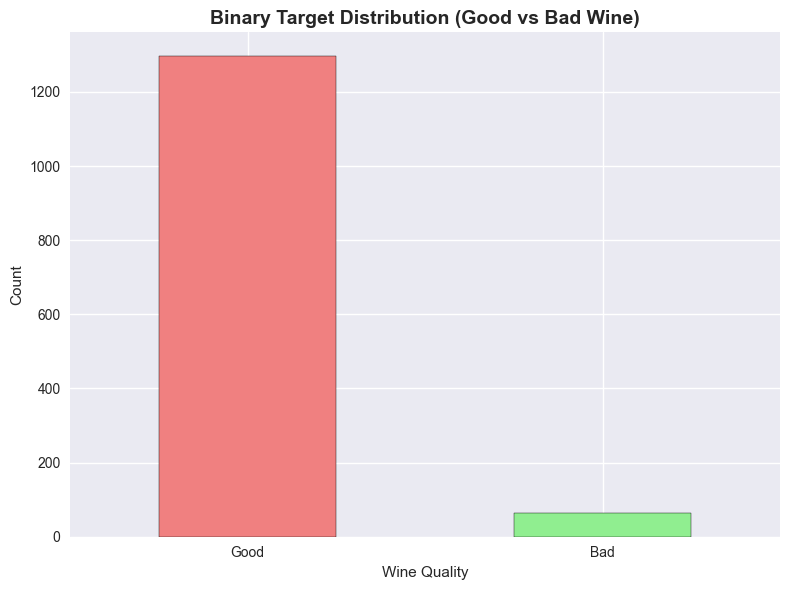

In [11]:
# Create binary target variable: quality >= 7 = "Good", else "Bad"
print("🎯 Creating binary target variable...")
df_processed['quality_binary'] = df_processed['quality'].apply(lambda x: 'Good' if x >= 5 else 'Bad')

print("Binary target distribution:")
print(df_processed['quality_binary'].value_counts())
print(f"\nGood wine percentage: {df_processed['quality_binary'].value_counts()['Good'] / len(df_processed) * 100:.1f}%")
print(f"Bad wine percentage: {df_processed['quality_binary'].value_counts()['Bad'] / len(df_processed) * 100:.1f}%")

# Visualize binary target distribution
plt.figure(figsize=(8, 6))
df_processed['quality_binary'].value_counts().plot(kind='bar', color=['lightcoral', 'lightgreen'], edgecolor='black')
plt.title('Binary Target Distribution (Good vs Bad Wine)', fontsize=14, fontweight='bold')
plt.xlabel('Wine Quality')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [12]:
# Feature scaling using StandardScaler
print("⚖️ Applying feature scaling...")

# Separate features and target
X = df_processed[features].copy()
y = df_processed['quality_binary'].copy()

# Initialize and fit scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=features, index=X.index)

print("✅ Feature scaling completed!")
print(f"Original feature ranges:")
for feature in features:
    print(f"• {feature}: {X[feature].min():.3f} to {X[feature].max():.3f}")

print(f"\nScaled feature ranges:")
for feature in features:
    print(f"• {feature}: {X_scaled_df[feature].min():.3f} to {X_scaled_df[feature].max():.3f}")

# Combine scaled features with target
df_final = pd.concat([X_scaled_df, y], axis=1)
print(f"\nFinal processed dataset shape: {df_final.shape}")


⚖️ Applying feature scaling...
✅ Feature scaling completed!
Original feature ranges:
• fixed acidity: 4.600 to 12.350
• volatile acidity: 0.120 to 1.015
• citric acid: 0.000 to 0.940
• residual sugar: 0.900 to 3.650
• chlorides: 0.039 to 0.122
• free sulfur dioxide: 1.000 to 42.000
• total sulfur dioxide: 6.000 to 124.500
• density: 0.992 to 1.001
• pH: 2.925 to 3.685
• sulphates: 0.330 to 1.000
• alcohol: 8.400 to 13.500

Scaled feature ranges:
• fixed acidity: -2.222 to 2.453
• volatile acidity: -2.302 to 2.749
• citric acid: -1.394 to 3.419
• residual sugar: -2.345 to 2.183
• chlorides: -2.317 to 2.228
• free sulfur dioxide: -1.494 to 2.669
• total sulfur dioxide: -1.299 to 2.540
• density: -2.469 to 2.473
• pH: -2.561 to 2.509
• sulphates: -2.330 to 2.548
• alcohol: -1.896 to 2.870

Final processed dataset shape: (1359, 12)


## 4. Save Processed Data


In [13]:
# Save processed data
print("💾 Saving processed data...")

# Save full processed dataset
df_final.to_csv('../data/processed/wine_processed.csv', index=False)
print("✅ Saved processed data to: ../data/processed/wine_processed.csv")

# Save sample data (100 rows)
sample_data = df_final.sample(n=100, random_state=42)
sample_data.to_csv('../data/sample/wine_sample.csv', index=False)
print("✅ Saved sample data to: ../data/sample/wine_sample.csv")

# Save scaler for later use
import pickle
with open('../backend/saved_models/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print("✅ Saved scaler to: ../backend/saved_models/scaler.pkl")

print(f"\n📊 Final Summary:")
print(f"• Original dataset: {df.shape[0]} rows, {df.shape[1]} columns")
print(f"• Processed dataset: {df_final.shape[0]} rows, {df_final.shape[1]} columns")
print(f"• Features: {len(features)}")
print(f"• Target: quality_binary (Good/Bad)")
print(f"• Good wine ratio: {df_final['quality_binary'].value_counts()['Good'] / len(df_final) * 100:.1f}%")
print(f"• Bad wine ratio: {df_final['quality_binary'].value_counts()['Bad'] / len(df_final) * 100:.1f}%")

print("\n🎉 Data preprocessing completed successfully!")
print("📁 Files created:")
print("  • ../data/processed/wine_processed.csv")
print("  • ../data/sample/wine_sample.csv") 
print("  • ../backend/saved_models/scaler.pkl")


💾 Saving processed data...
✅ Saved processed data to: ../data/processed/wine_processed.csv
✅ Saved sample data to: ../data/sample/wine_sample.csv
✅ Saved scaler to: ../backend/saved_models/scaler.pkl

📊 Final Summary:
• Original dataset: 1599 rows, 12 columns
• Processed dataset: 1359 rows, 12 columns
• Features: 11
• Target: quality_binary (Good/Bad)
• Good wine ratio: 95.4%
• Bad wine ratio: 4.6%

🎉 Data preprocessing completed successfully!
📁 Files created:
  • ../data/processed/wine_processed.csv
  • ../data/sample/wine_sample.csv
  • ../backend/saved_models/scaler.pkl
